In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

   Feature-1  Feature-2  Target
0  -4.019373  -4.865132       0
1  -4.188254  -4.134534       0
2  -3.312226   4.347394       2
3   4.878362  -5.276293       1
4   5.708186  -4.692576       1


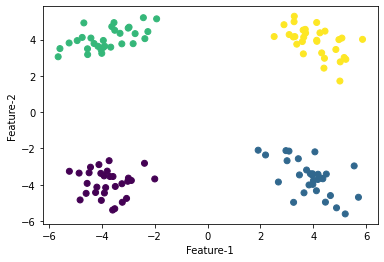

In [2]:
data = make_classification(n_samples=120, n_features=2, n_classes=4, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, class_sep=4, random_state=35)
df1 = pd.DataFrame(data[0], columns=['Feature-1','Feature-2'])
df2 = pd.DataFrame(data[1],columns=['Target'])
df = pd.concat([df1,df2],axis=1)
print(df.head())
plt.scatter(df['Feature-1'],df['Feature-2'],c=df['Target'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [3]:
df['Target'].unique()

array([0, 2, 1, 3])

## One Vs Rest

In [4]:
model = LogisticRegression(multi_class='ovr', max_iter=500)
model.fit(df[['Feature-1','Feature-2']],df['Target'])
y_pred = model.predict(df[['Feature-1','Feature-2']])
accuracy = np.mean(y_pred == df['Target'])
print(accuracy)

1.0


In [5]:
theta00, theta01, theta02, theta03 = model.intercept_
theta10, theta20 = model.coef_[0]
theta11, theta21 = model.coef_[1]
theta12, theta22 = model.coef_[2]
theta13, theta23 = model.coef_[3]
m1 = - (theta10/theta20)
c1 = - (theta00/theta20)

m2 = - (theta11/theta21)
c2 = - (theta01/theta21)

m3 = - (theta12/theta22)
c3 = - (theta02/theta22)

m4 = - (theta13/theta23)
c4 = - (theta03/theta23)

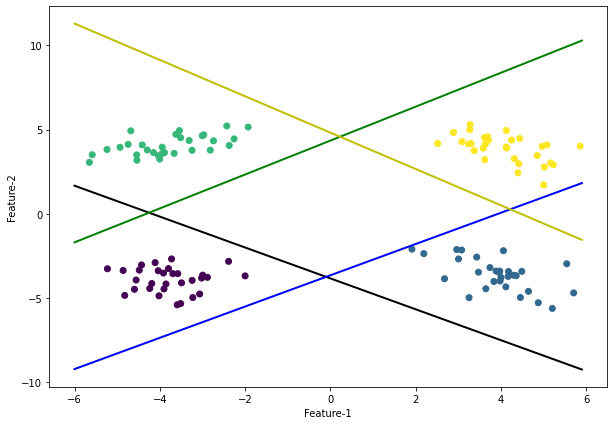

In [7]:
x = np.arange(-6, 6, 0.1)
x1  = m1 * x + c1
x2  = m2 * x + c2
x3  = m3 * x + c3
x4  = m4 * x + c4
plt.figure(figsize=(10,7))
plt.scatter(df['Feature-1'],df['Feature-2'],c=df['Target'])
plt.plot(x,x1, linewidth = '2',color="k")
plt.plot(x,x2, linewidth = '2',color="b")
plt.plot(x,x3, linewidth = '2',color="g")
plt.plot(x,x4, linewidth = '2',color="y")
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

## Softmax

In [8]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
model.fit(df[['Feature-1','Feature-2']],df['Target'])
y_pred = model.predict(df[['Feature-1','Feature-2']])
accuracy = np.mean(y_pred == df['Target'])
print(accuracy)

1.0


In [9]:
theta00, theta01, theta02, theta03 = model.intercept_
theta10, theta20 = model.coef_[0]
theta11, theta21 = model.coef_[1]
theta12, theta22 = model.coef_[2]
theta13, theta23 = model.coef_[3]
m1 = - (theta10/theta20)
c1 = - (theta00/theta20)

m2 = - (theta11/theta21)
c2 = - (theta01/theta21)

m3 = - (theta12/theta22)
c3 = - (theta02/theta22)

m4 = - (theta13/theta23)
c4 = - (theta03/theta23)

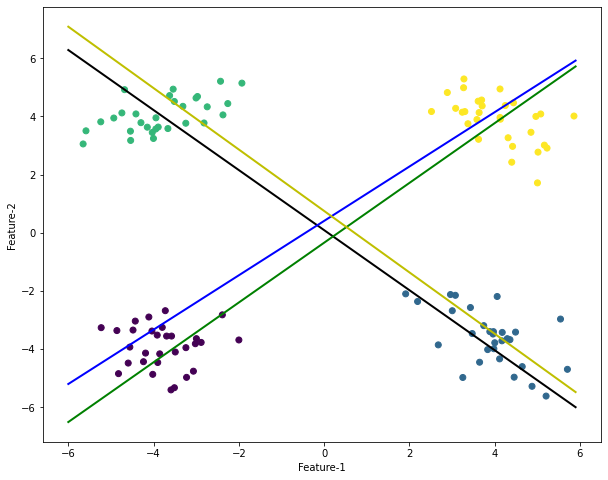

In [12]:
x = np.arange(-6, 6, 0.1)
x1  = m1 * x + c1
x2  = m2 * x + c2
x3  = m3 * x + c3
x4  = m4 * x + c4
plt.figure(figsize=(10,8))
plt.scatter(df['Feature-1'],df['Feature-2'],c=df['Target'])
plt.plot(x,x1, linewidth = '2',color="k")
plt.plot(x,x2, linewidth = '2',color="b")
plt.plot(x,x3, linewidth = '2',color="g")
plt.plot(x,x4, linewidth = '2',color="y")
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [17]:
model.predict_proba(df[['Feature-1','Feature-2']][4:5])

array([[1.47767452e-04, 9.99254888e-01, 2.02895432e-07, 5.97141416e-04]])

In [18]:
df['Target'][4:5]

4    1
Name: Target, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(df[['Feature-1','Feature-2']])
print("Confusion Matrix\n", confusion_matrix(df['Target'],y_pred))

Confusion Matrix
 [[30  0  0  0]
 [ 0 30  0  0]
 [ 0  0 30  0]
 [ 0  0  0 30]]
